In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv('flight_price_train.csv')
data1=pd.read_csv('flight_price_test.csv')

In [3]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
data1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127]),
 [Text(0, 0, 'BLR ? DEL'),
  Text(1, 0, 'CCU ? IXR ? BBI ? BLR'),
  Text(2, 0, 'DEL ? LKO ? BOM ? COK'),
  Text(3, 0, 'CCU ? NAG ? BLR'),
  Text(4, 0, 'BLR ? NAG ? DEL'),
  Text(5, 0, 'CCU ? BLR'),
  Text(6, 0, 'BLR ? BOM ? DEL'),
  Text(7, 0, 'DEL ? BOM ? COK'),
  Text(8, 0, '

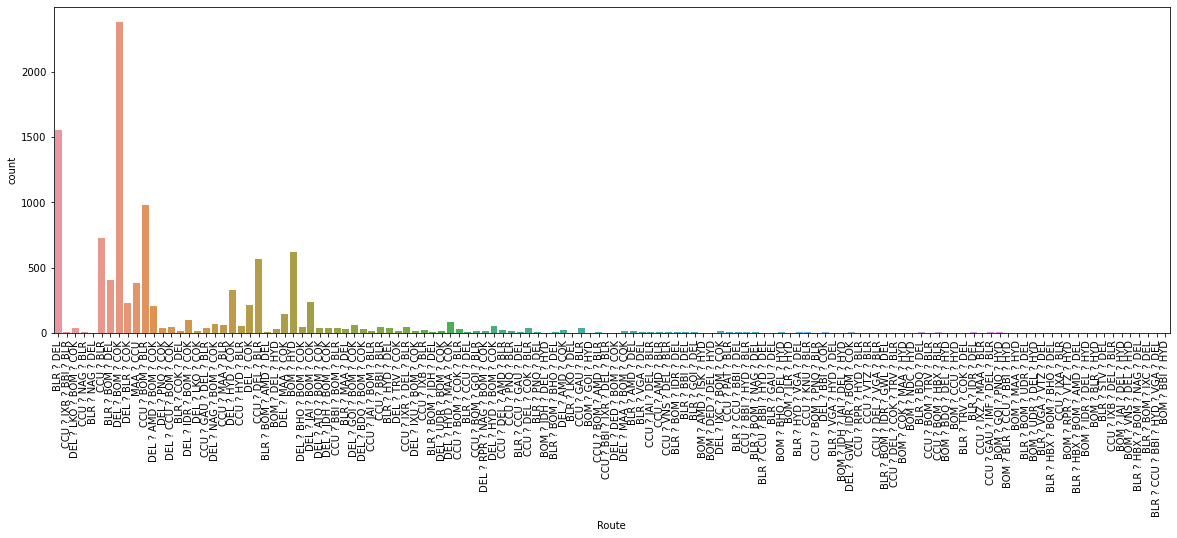

In [7]:
plt.figure(figsize=(20,6))
sns.countplot(data['Route'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'non-stop'),
  Text(1, 0, '2 stops'),
  Text(2, 0, '1 stop'),
  Text(3, 0, '3 stops'),
  Text(4, 0, '4 stops')])

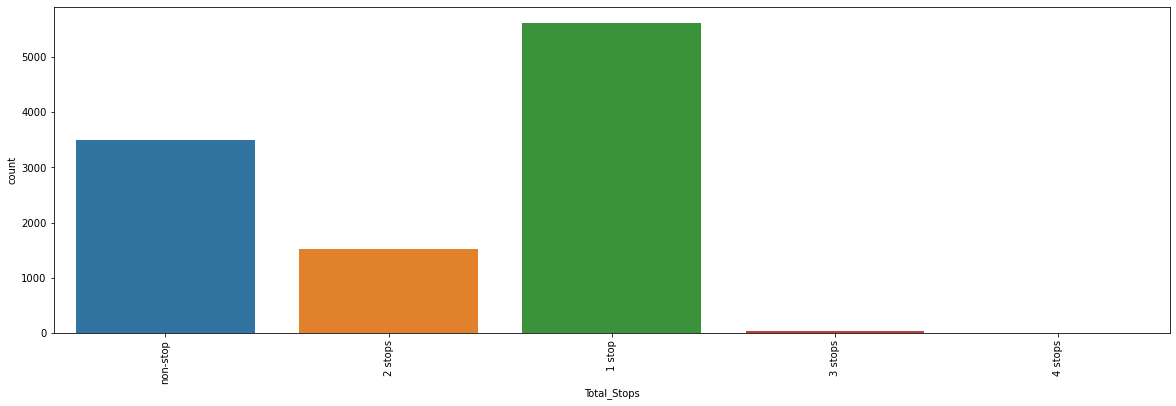

In [8]:
plt.figure(figsize=(20,6))
sns.countplot(data['Total_Stops'])
plt.xticks(rotation=90)

In [9]:
# fill missing values.
data['Route'].fillna(data['Route'].mode()[0],inplace=True)
data['Total_Stops'].fillna(data['Total_Stops'].mode()[0],inplace=True)

In [10]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Now there is no missing value in dataset.

In [11]:
for i in data:
    print(data[i].unique())    

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
['BLR ? DEL' 'CCU ? IXR ? BBI ? BLR' 'DEL ? LKO ? BOM ? COK'
 'CCU ? NAG ? BLR' 'BLR ? NAG ? DEL' 'CCU ? BLR' 'BLR ? BOM ? DEL'

In [12]:
data['Additional_Info'].replace({"No info": 'No Info'}, inplace = True)

## Now Convert Categorical data to numeric data

In [13]:
data["DayOfJourney"] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.day
data["MonthOfJourney"] = pd.to_datetime(data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
data["YearOfJourney"]=2019
data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [14]:
data['DayOfJourney']

0        24
1         1
2         9
3        12
4         1
         ..
10678     9
10679    27
10680    27
10681     1
10682     9
Name: DayOfJourney, Length: 10683, dtype: int64

In [15]:
data["Dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour
data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute
data.drop(["Dep_Time"], axis = 1, inplace = True)

In [16]:
data['Dep_hour']

0        22
1         5
2         9
3        18
4        16
         ..
10678    19
10679    20
10680     8
10681    11
10682    10
Name: Dep_hour, Length: 10683, dtype: int64

In [17]:
data['Dep_min']

0        20
1        50
2        25
3         5
4        50
         ..
10678    55
10679    45
10680    20
10681    30
10682    55
Name: Dep_min, Length: 10683, dtype: int64

In [18]:
data["Arrival_hour"] = pd.to_datetime(data["Arrival_Time"]).dt.hour
data["Arrival_min"] = pd.to_datetime(data["Arrival_Time"]).dt.minute
data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [19]:
data['Arrival_hour']

0         1
1        13
2         4
3        23
4        21
         ..
10678    22
10679    23
10680    11
10681    14
10682    19
Name: Arrival_hour, Length: 10683, dtype: int64

In [20]:
def duration(x):
    x=x.split(' ')
    hours=0
    mins=0
    if len(x)==1:
        x=x[0]
        if x[-1]=='h':   #match last word of x if h then put no.in hours up to second last value
            hours=int(x[:-1])
        else:
            mins=int(x[:-1])
    else:
        hours=int(x[0][:-1])
        mins=int(x[1][:-1])
    return hours,mins
data['Duration_hours']=data.Duration.apply(lambda x:duration(x)[0])
data['Duration_mins']=data.Duration.apply(lambda x:duration(x)[1])
data.drop(["Duration"], axis = 1, inplace = True)

In [21]:
data['Duration_hours']

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration_hours, Length: 10683, dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10683 non-null  object
 4   Total_Stops      10683 non-null  object
 5   Additional_Info  10683 non-null  object
 6   Price            10683 non-null  int64 
 7   DayOfJourney     10683 non-null  int64 
 8   MonthOfJourney   10683 non-null  int64 
 9   YearOfJourney    10683 non-null  int64 
 10  Dep_hour         10683 non-null  int64 
 11  Dep_min          10683 non-null  int64 
 12  Arrival_hour     10683 non-null  int64 
 13  Arrival_min      10683 non-null  int64 
 14  Duration_hours   10683 non-null  int64 
 15  Duration_mins    10683 non-null  int64 
dtypes: int64(10), object(6)
memory usage: 1.3+ MB


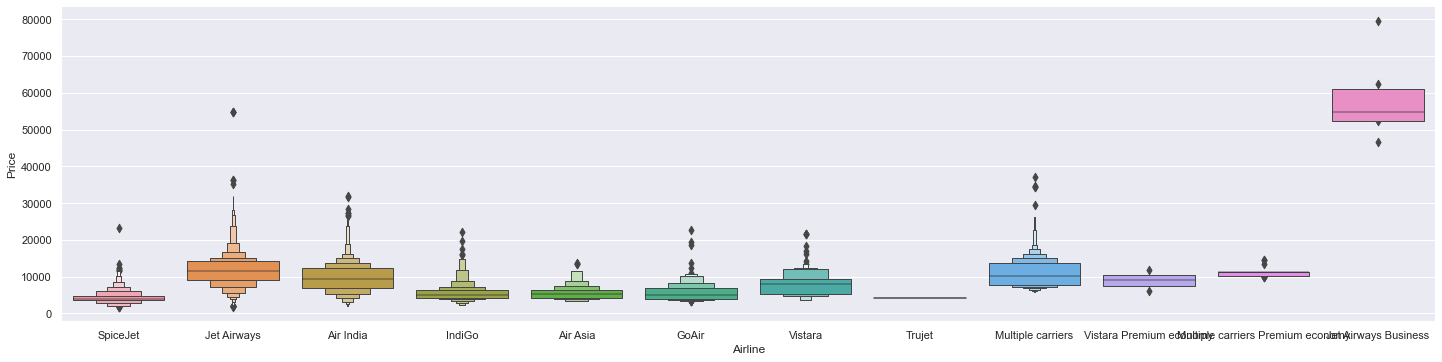

In [23]:
sns.set()
sns.catplot(y = "Price", x = "Airline", data =data.sort_values("Price"), kind="boxen", height = 5, aspect = 4)
plt.show()

### Now use encoding method convert this all categorical data into numeric data

In [24]:
enc=LabelEncoder()
data['Airline']=enc.fit_transform(data['Airline'])
data['Source']=enc.fit_transform(data['Source'])
data['Destination']=enc.fit_transform(data['Destination'])
data['Route']=enc.fit_transform(data['Route'])
data['Total_Stops']=enc.fit_transform(data['Total_Stops'])
data['Additional_Info']=enc.fit_transform(data['Additional_Info'])

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10683 non-null  int32
 1   Source           10683 non-null  int32
 2   Destination      10683 non-null  int32
 3   Route            10683 non-null  int32
 4   Total_Stops      10683 non-null  int32
 5   Additional_Info  10683 non-null  int32
 6   Price            10683 non-null  int64
 7   DayOfJourney     10683 non-null  int64
 8   MonthOfJourney   10683 non-null  int64
 9   YearOfJourney    10683 non-null  int64
 10  Dep_hour         10683 non-null  int64
 11  Dep_min          10683 non-null  int64
 12  Arrival_hour     10683 non-null  int64
 13  Arrival_min      10683 non-null  int64
 14  Duration_hours   10683 non-null  int64
 15  Duration_mins    10683 non-null  int64
dtypes: int32(6), int64(10)
memory usage: 1.1 MB


In [26]:
data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,DayOfJourney,MonthOfJourney,YearOfJourney,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3,0,5,18,4,6,3897,24,3,2019,22,20,1,10,2,50
1,1,3,0,84,1,6,7662,1,5,2019,5,50,13,15,7,25
2,4,2,1,118,1,6,13882,9,6,2019,9,25,4,25,19,0
3,3,3,0,91,0,6,6218,12,5,2019,18,5,23,30,5,25
4,3,0,5,29,0,6,13302,1,3,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,4,6,4107,9,4,2019,19,55,22,25,2,30
10679,1,3,0,64,4,6,4145,27,4,2019,20,45,23,20,2,35
10680,4,0,2,18,4,6,7229,27,4,2019,8,20,11,20,3,0
10681,10,0,5,18,4,6,12648,1,3,2019,11,30,14,10,2,40


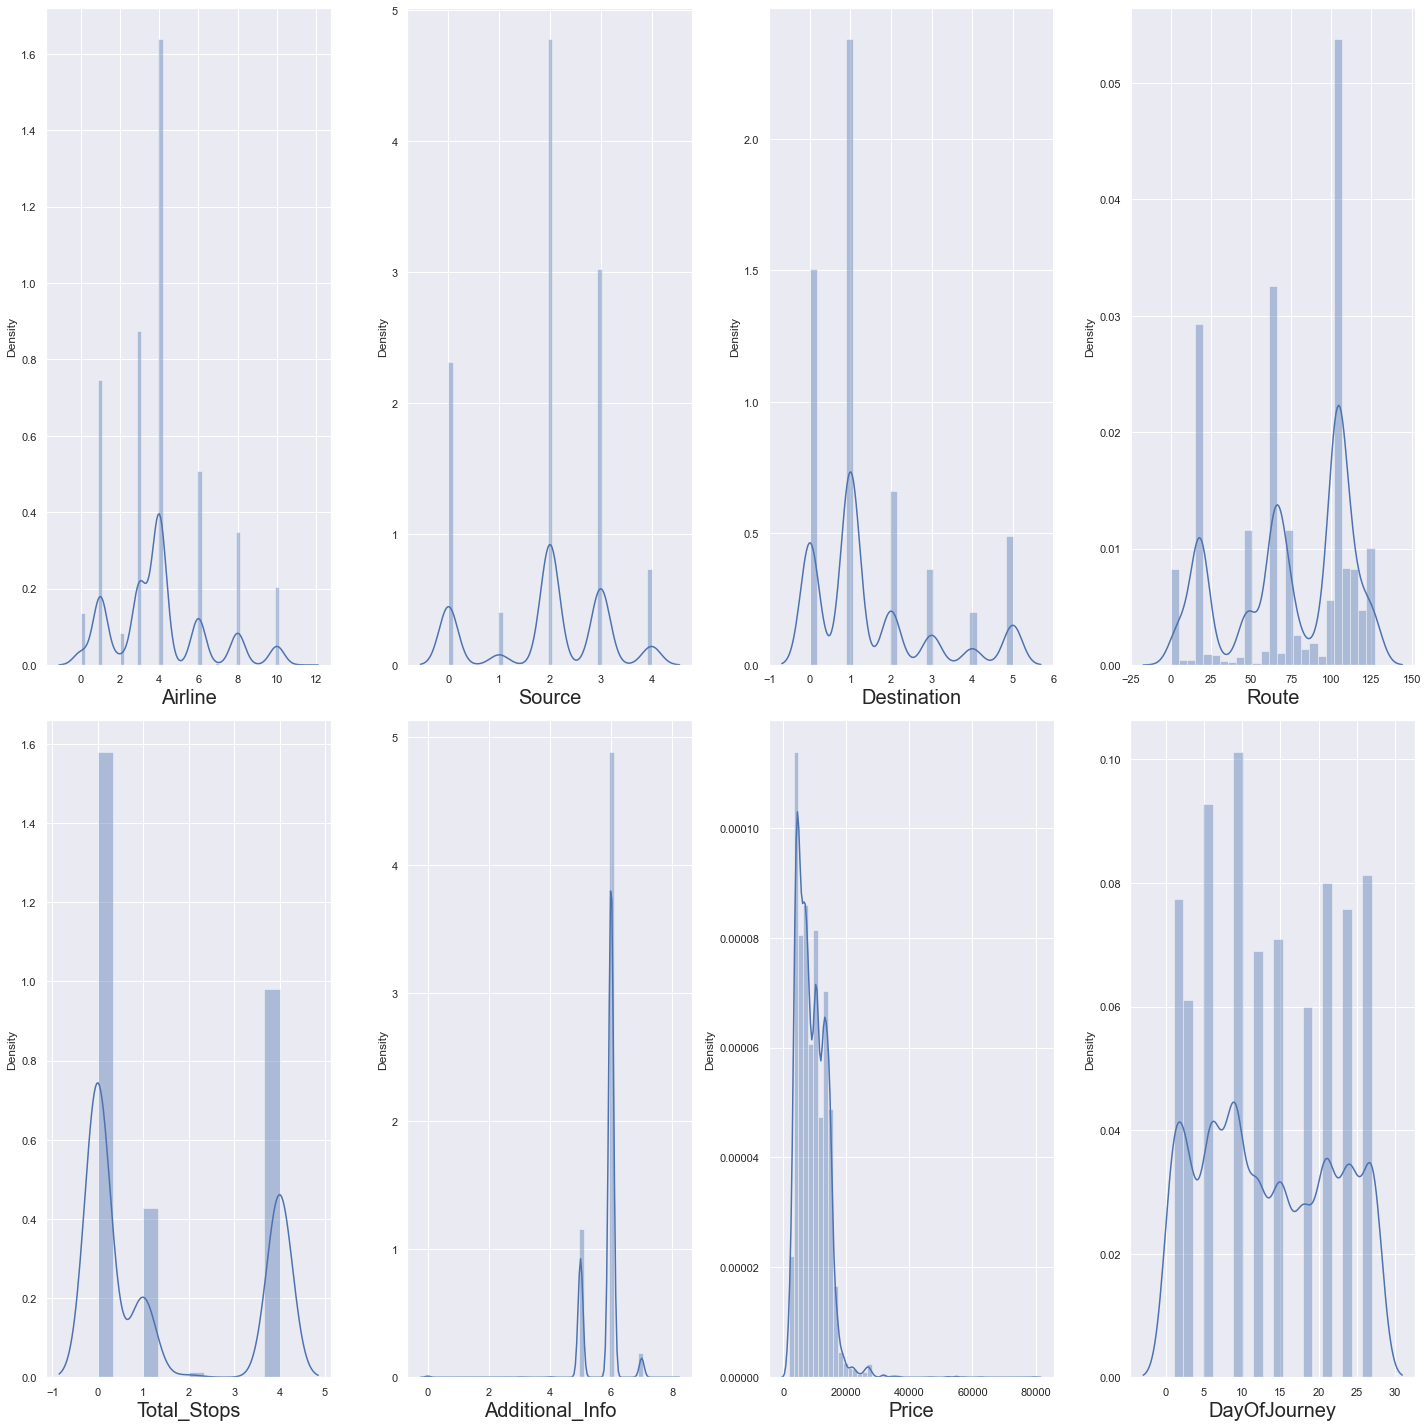

In [27]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:>

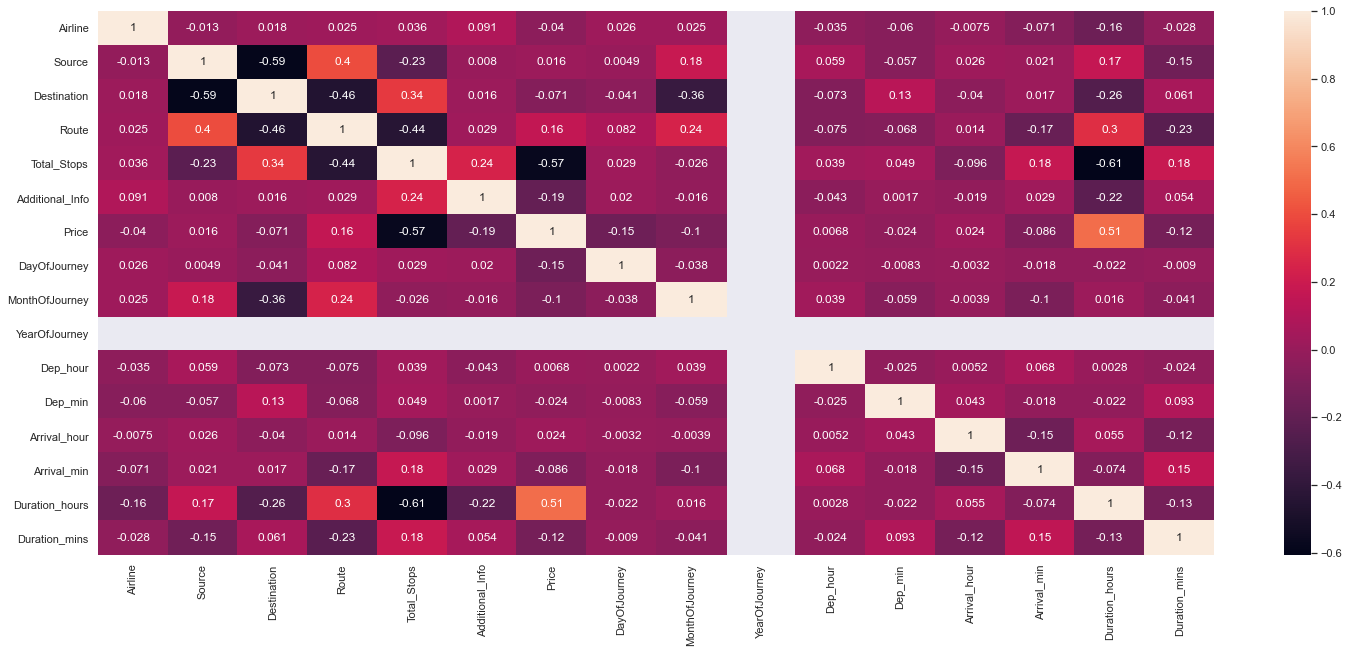

In [28]:
plt.figure(figsize=(25,10))
sns.heatmap(data.corr(),annot=True)

In [29]:
data=data.drop('YearOfJourney',axis=1)

In [30]:
data.describe()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,DayOfJourney,MonthOfJourney,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,3.965927,1.952261,1.436113,74.822896,1.458111,5.830666,9087.064121,13.508378,4.708602,12.490686,24.411214,13.348778,24.690630,10.246092,28.327717
std,2.352155,1.177221,1.474782,36.728405,1.806290,0.510943,4611.359167,8.479277,1.164357,5.748650,18.767980,6.859125,16.506036,8.495414,16.945400
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,48.000000,0.000000,6.000000,5277.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,4.000000,2.000000,1.000000,73.000000,0.000000,6.000000,8372.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,4.000000,3.000000,2.000000,104.000000,4.000000,6.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,11.000000,4.000000,5.000000,127.000000,4.000000,8.000000,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


## Feature selection

In [31]:
X=data.drop('Price',axis=1)
y=data['Price']

In [32]:
X

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,DayOfJourney,MonthOfJourney,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3,0,5,18,4,6,24,3,22,20,1,10,2,50
1,1,3,0,84,1,6,1,5,5,50,13,15,7,25
2,4,2,1,118,1,6,9,6,9,25,4,25,19,0
3,3,3,0,91,0,6,12,5,18,5,23,30,5,25
4,3,0,5,29,0,6,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,4,6,9,4,19,55,22,25,2,30
10679,1,3,0,64,4,6,27,4,20,45,23,20,2,35
10680,4,0,2,18,4,6,27,4,8,20,11,20,3,0
10681,10,0,5,18,4,6,1,3,11,30,14,10,2,40


In [33]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int64

### Here we can wee that continous data in Outcome so we have to use linear regrssion model

In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier,ExtraTreesRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [35]:
lr=LinearRegression()
mms=MinMaxScaler()
rf=RandomForestRegressor()
xg=XGBRegressor()
etr=ExtraTreesRegressor()

In [36]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    print(f"At random state {i},the training accuracy is:-{r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:-{r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:-0.9812684081141795
At random state 0,the testing accuracy is:-0.8708869261924759


At random state 1,the training accuracy is:-0.9794716242635352
At random state 1,the testing accuracy is:-0.901526015365415


At random state 2,the training accuracy is:-0.979984187320756
At random state 2,the testing accuracy is:-0.8990141499560753


At random state 3,the training accuracy is:-0.9820568299077682
At random state 3,the testing accuracy is:-0.8524714830178196


At random state 4,the training accuracy is:-0.9823513946897531
At random state 4,the testing accuracy is:-0.8684347578131828


At random state 5,the training accuracy is:-0.9788137062342811
At random state 5,the testing accuracy is:-0.8174560406934107


At random state 6,the training accuracy is:-0.9767459148587299
At random state 6,the testing accuracy is:-0.8708370349088022


At random state 7,the training accuracy is:-0.9798239024250657
At random state 7,the testing accuracy is:-0.90993

At random state 64,the training accuracy is:-0.9810944202033058
At random state 64,the testing accuracy is:-0.9033427833537845


At random state 65,the training accuracy is:-0.9824293733526691
At random state 65,the testing accuracy is:-0.8655497819114616


At random state 66,the training accuracy is:-0.9833255721622847
At random state 66,the testing accuracy is:-0.8295647913726011


At random state 67,the training accuracy is:-0.9812889049542468
At random state 67,the testing accuracy is:-0.8724598170537854


At random state 68,the training accuracy is:-0.9788555747704404
At random state 68,the testing accuracy is:-0.9097661198028539


At random state 69,the training accuracy is:-0.9818263443351766
At random state 69,the testing accuracy is:-0.8848828747624763


At random state 70,the training accuracy is:-0.9832298132967133
At random state 70,the testing accuracy is:-0.8598721723641332


At random state 71,the training accuracy is:-0.9819654376737202
At random state 71,the testing ac

In [37]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=77)
for i in [lr,rf,xg,etr]:
    i.fit(x_train,y_train)
    pred_train=i.predict(x_train)
    pred_test=i.predict(x_test)
    print(i)
    print(f"The training accuracy is:-{r2_score(y_train,pred_train)}")
    print(f"The testing accuracy is:-{r2_score(y_test,pred_test)}")
    print("\n")

LinearRegression()
The training accuracy is:-0.41012997468642487
The testing accuracy is:-0.45008239137888484


RandomForestRegressor()
The training accuracy is:-0.9800190093563236
The testing accuracy is:-0.9167273841802565


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
The training accuracy is:-0.9764603192289432
The testing accuracy is:-0.9143375280353132


ExtraTreesRegressor()
The training accuracy is:-0.9965015308673464
The testing accuracy is:-0.91962292662578

In [38]:
!pip install lazypredict

In [39]:
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(x_train, x_test, y_train, y_test)
models.head(10)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [01:16<00:00,  1.82s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.92,0.92,1234.30,2.77
RandomForestRegressor,0.92,0.92,1273.28,3.23
XGBRegressor,0.91,0.91,1287.44,0.78
BaggingRegressor,0.90,0.90,1374.82,0.43
LGBMRegressor,0.90,0.90,1379.31,0.24
HistGradientBoostingRegressor,0.90,0.90,1389.05,1.79
DecisionTreeRegressor,0.86,0.86,1652.23,0.08
GradientBoostingRegressor,0.85,0.85,1722.56,0.99
ExtraTreeRegressor,0.84,0.84,1740.66,0.06


In [40]:
print(f"The training accuracy is:-{r2_score(y_train,pred_train)}")
print(f"The testing accuracy is:-{r2_score(y_test,pred_test)}")

The training accuracy is:-0.9965015308673464
The testing accuracy is:-0.9196229266257844


In [41]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(rf,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for traing is {Train_accuracy} and accuracy for test is {Test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.8605681563977221 and accuracy score for traing is 0.9965015308673464 and accuracy for test is 0.9196229266257844


At cross fold 3 the cv score is 0.8654108328258826 and accuracy score for traing is 0.9965015308673464 and accuracy for test is 0.9196229266257844


At cross fold 4 the cv score is 0.8811104162677333 and accuracy score for traing is 0.9965015308673464 and accuracy for test is 0.9196229266257844


At cross fold 5 the cv score is 0.8876637307142892 and accuracy score for traing is 0.9965015308673464 and accuracy for test is 0.9196229266257844


At cross fold 6 the cv score is 0.8857995494067693 and accuracy score for traing is 0.9965015308673464 and accuracy for test is 0.9196229266257844


At cross fold 7 the cv score is 0.8907700120477314 and accuracy score for traing is 0.9965015308673464 and accuracy for test is 0.9196229266257844


At cross fold 8 the cv score is 0.8877469030112756 and accuracy score for traing is 0.9965015308673464 and

### Check cross validation for ExtraTreeRegression

In [42]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(etr,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for traing is {Train_accuracy} and accuracy for test is {Test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.8807721012151162 and accuracy score for traing is 0.9965015308673464 and accuracy for test is 0.9196229266257844


At cross fold 3 the cv score is 0.8822780677655998 and accuracy score for traing is 0.9965015308673464 and accuracy for test is 0.9196229266257844


At cross fold 4 the cv score is 0.8926276161552897 and accuracy score for traing is 0.9965015308673464 and accuracy for test is 0.9196229266257844


At cross fold 5 the cv score is 0.9022880449781632 and accuracy score for traing is 0.9965015308673464 and accuracy for test is 0.9196229266257844


At cross fold 6 the cv score is 0.9059105449299748 and accuracy score for traing is 0.9965015308673464 and accuracy for test is 0.9196229266257844


At cross fold 7 the cv score is 0.9055015948667806 and accuracy score for traing is 0.9965015308673464 and accuracy for test is 0.9196229266257844


At cross fold 8 the cv score is 0.9028138081863353 and accuracy score for traing is 0.9965015308673464 and

In [47]:
cv_score=cross_val_score(etr,X,y,cv=9)
cv_mean=cv_score.mean()
print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for traing is {Train_accuracy} and accuracy for test is {Test_accuracy}")

At cross fold 9 the cv score is 0.9071489695513376 and accuracy score for traing is 0.9965015308673464 and accuracy for test is 0.9196229266257844


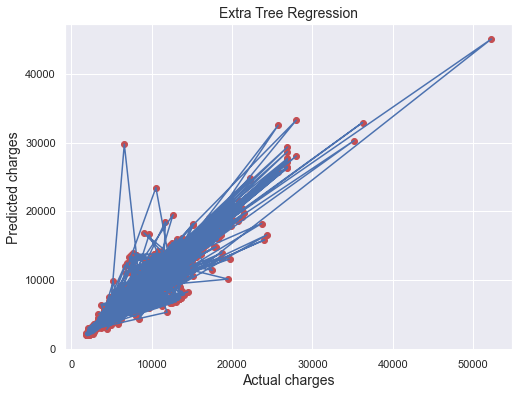

In [48]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,pred_test,color='b')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('Extra Tree Regression',fontsize=14)
plt.show()

# Model Saving

In [49]:
import pickle
filename='flight_price.pkl'
pickle.dump(etr,open(filename,'wb'))

# Conclusion

In [50]:
import numpy as np
a=np.array(y_test)
predicted=np.array(etr.predict(x_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
df_com.head(25)

,original,predicted
0,7229,7229.00
1,11200,11177.44
2,12537,8308.88
3,10529,9885.67
4,10975,10314.71
5,10975,11073.26
6,11087,11087.00
7,5277,4349.87
8,4823,4892.49
9,15764,15736.51
